# Model fitting

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


In [3]:
test_SEDs

['/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/jetset-1.1.0-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/jetset-1.1.0-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.ecsv',
 '/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/jetset-1.1.0-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk501.ecsv']

## loading data



In [4]:
print(test_SEDs[1])
data=Data.from_file(test_SEDs[1])


/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/jetset-1.1.0-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.ecsv



***  binning data  ***
---> N bins= 89
---> bin_widht= 0.2



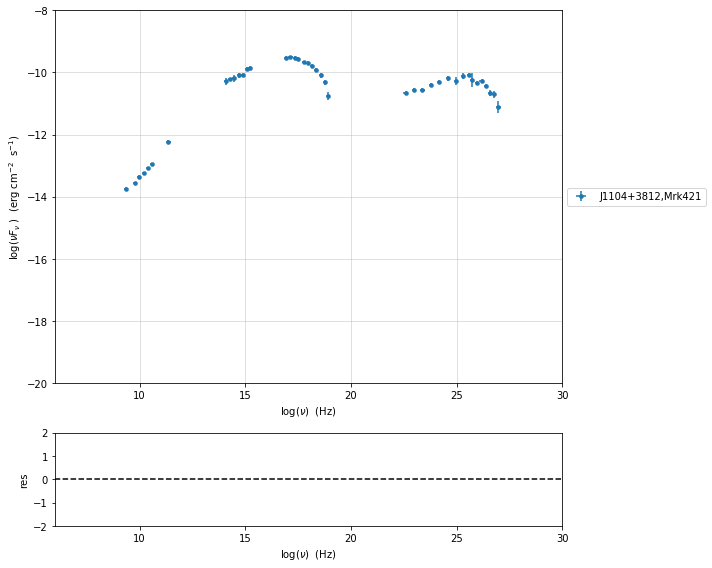

In [5]:
%matplotlib inline
sed_data=ObsData(data_table=data)
sed_data.group_data(bin_width=0.2)

sed_data.add_systematics(0.1,[10.**6,10.**29])
p=sed_data.plot_sed()

## phenomenological model constraining

### spectral indices


*** evaluating spectral indices for data ***
---> initial range for index radio  set to [6.000000,10.000000]
---> range for index radio updated  to [6.000000,10.000000]
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.426527e+00, err=1.242337e-01 

---> initial range for index radio_mm  set to [10.000000,11.000000]
---> range for index radio_mm updated  to [10.000000,11.000000]
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-1.290348e+00, err=3.549105e-02 

---> initial range for index mm_IR  set to [11.000000,13.000000]
---> range for index mm_IR updated  to [10.300000,13.700000]
---> name = mm_IR            range=[10.300,13.700] log(Hz)  photon.val=-1.113008e+00, err=5.915490e-02 

---> initial range for index IR_Opt  set to [13.000000,14.000000]
---> range for index IR_Opt updated  to [12.500000,14.500000]
---> name = IR_Opt           range=[12.500,14.500] log(Hz)  photon.val=-1.783218e+00, err=9.834847e-02 

---> initial range for i

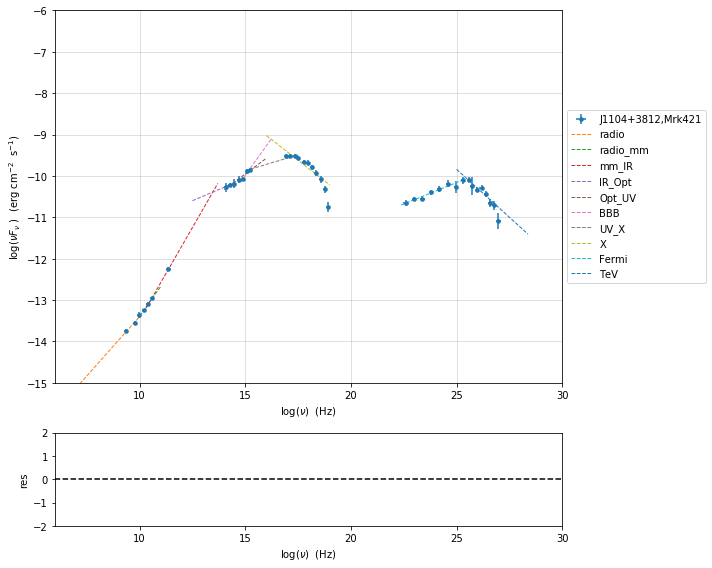

In [9]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

### sed shaper

In [10]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=False,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10,21])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP

name   par type       units              val          phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- --------------------- ---------------- ---------------- ----- ------
   b    curvature                -0.15453004839441498            -10.0              0.0 False  False
   c third-degree               -0.010232447712917647            -10.0             10.0 False  False
  Ep    peak freq            Hz    16.722672085915843              0.0             30.0  True  False
  Sp    peak flux erg / (cm2 s)    -9.491658506170065            -30.0              0.0  True  False


---> sync       nu_p=+1.672267e+01 (err=+4.139905e-02)  nuFnu_p=-9.491659e+00 (err=+2.515288e-02) curv.=-1.545300e-01 (err=+9.534752e-03)




*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-fit
name   par type       units             val          phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- -------------------- ---------------- ---------------- ----- ------
   b    curvature               -0.20979248257934202            -10.0              0.0 False  False
   c third-degree               -0.04662648109652068            -10.0             10.0 False  False
  Ep    peak freq            Hz   25.249320432055992              0.0             30.0  True  False
  Sp    peak flux erg / (cm2 s)  -10.110940957544976            -30.0              0.0  True  False

converged=True
calls=202
------------------------------------------------------------------
| FCN = 5.911                   |     Ncalls=201 (201 total)     |
| EDM = 5.56E

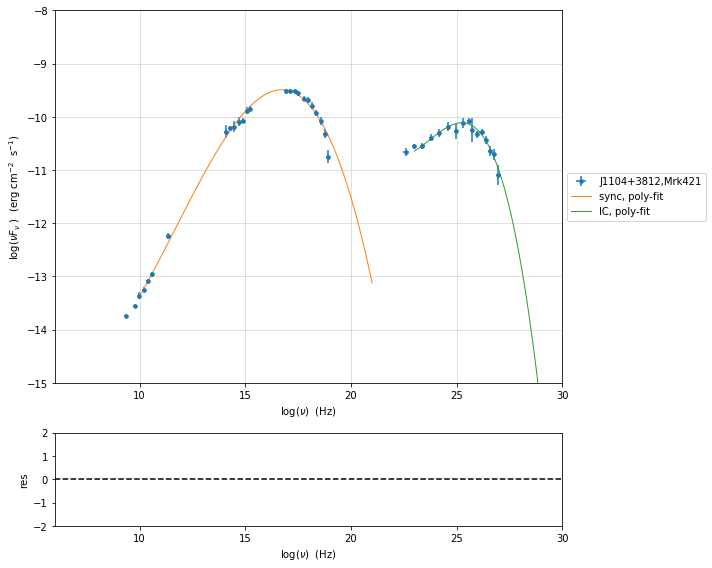

In [11]:
my_shape.IC_fit(fit_range=[23,29],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15)

### model constraining

In [12]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E12,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False)
prefit_jet.save_model('prefit_jet.dat')


***  constrains parameters from observable ***

---> ***  emitting region parameters  ***
---> name = beam_obj          type = beaming               units = Lorentz-factor*   val = +2.500000e+01  phys-bounds = [+1.000000e-04,No           ] islog = False  froze= False 
---> setting par type redshift, corresponding to par z_cosm
--->  name = z_cosm            type = redshift              units =                   val = +3.080000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type magnetic_field, corresponding to par B
--->  name = B                 type = magnetic_field        units = G                 val = +5.050000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type region_size, corresponding to par R
--->  name = R                 type = region_size           units = cm                val = +1.884609e+17  phys-bounds = [+1.000000e+03,+1.000000e+30] islog = False  froze= False 


---> **

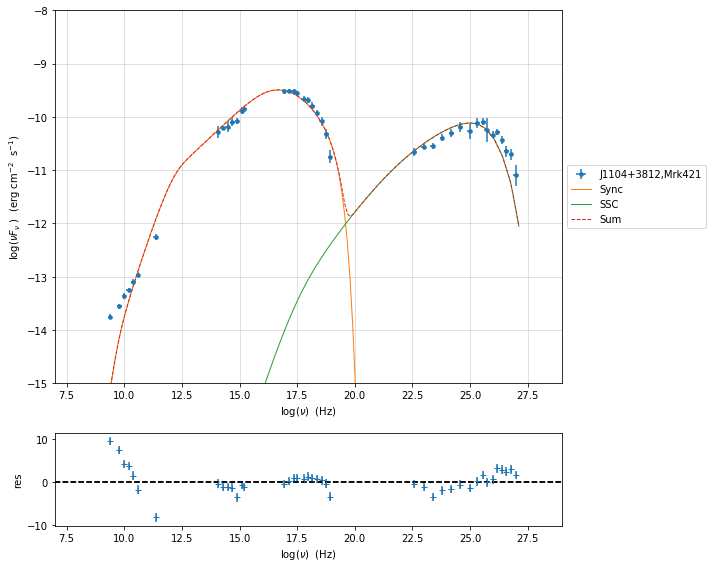

In [13]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

## Model fitting only Synchorotron component

### Model fitting with Minuit

In [25]:
from jetset.jet_model import Jet
jet_minuit=Jet.load_model('prefit_jet.dat')
jet_minuit.set_gamma_grid_size(200)

      name             par type           units               val          phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- --------------------- ---------------- ------------------ ----- ------
               R         region_size              cm 1.649187684856415e+16           1000.0              1e+30 False  False
             R_H     region_position              cm                 1e+17              0.0               None False   True
               B      magnetic_field               G                   0.1              0.0               None False  False
        beam_obj             beaming Lorentz-factor*                  25.0           0.0001               None False  False
          z_cosm            redshift                                0.0308              0.0               None False  False
               N    electron_density         1 / cm3     3.072163777115778              0.0               None False  False
        

we switch off the IC component

In [26]:

jet_minuit.spectral_components.SSC.state='off'
jet_minuit.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electron distribution:
 type: lppl  
 electron energy grid size:  201
 gmin grid : 3.338231e+02
 gmax grid : 9.758134e+05
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: off
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

      name             par type           units               val          phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------

In [27]:

fit_model_minuit=FitModel( jet=jet_minuit, name='Only-Synch-best-fit-minuit') 
fit_model_minuit.freeze('z_cosm')
fit_model_minuit.freeze('R_H')
fit_model_minuit.freeze('R')
fit_model_minuit.freeze('gmax')
fit_model_minuit.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_minuit.parameters.beam_obj.fit_range=[5,50]

model_minimizer_minuit,best_fit_minuit=fit_SED(fit_model_minuit,sed_data,10.0**15,10**20.0,fitname='SSC-best-fit-minuit',minimizer='minuit',max_ev=None)
best_fit_minuit.save_report('Only-Synch-best-fit-minuit.txt')

filtering data in fit range = [1.000000e+15,1.000000e+20]
data length 13

*** start fit process ***
initial pars: 
      name             par type           units               val          phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- --------------------- ---------------- ------------------ ----- ------
               R         region_size              cm 1.649187684856415e+16           1000.0              1e+30 False   True
             R_H     region_position              cm                 1e+17              0.0               None False   True
               B      magnetic_field               G                   0.1              0.0               None False  False
        beam_obj             beaming Lorentz-factor*                  25.0           0.0001               None False  False
          z_cosm            redshift                                0.0308              0.0               None False   True
               N 

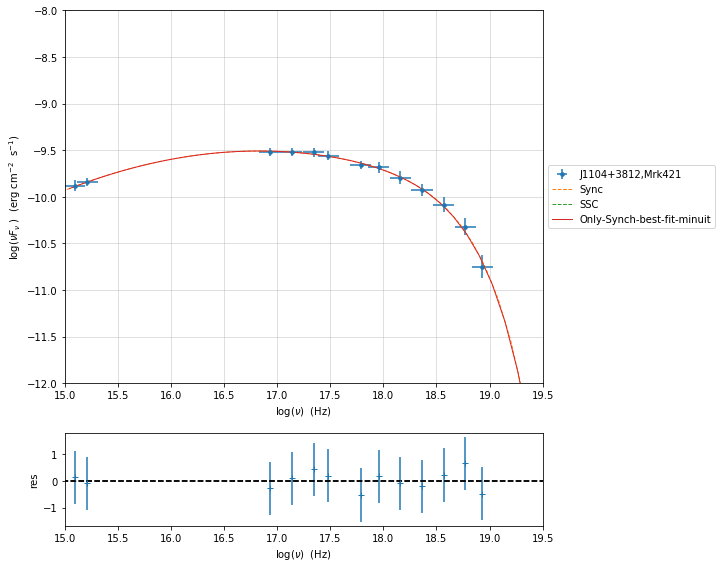

In [33]:
%matplotlib inline
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=fit_model_minuit.plot_model(sed_data=sed_data)
p2.rescale(y_min=-12,x_min=15,x_max=19.5)

In [34]:
model_minimizer_minuit.minimizer.mesg

------------------------------------------------------------------
| FCN = 1.432                   |     Ncalls=654 (654 total)     |
| EDM = 1.38E-05 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | par_0 |   0.041   |   0.005   |            |            |    0    |         |       |
| 1 | par_1 |   23.3    |    1.9    |            |            |    5    |   50    |       |
| 2 | par_2 |    4.5    |    1.4    |            |            |    0    |         |       |
| 3 | par_3 |    330    |    120    |            |            |    1    |  1e+09  |       |
| 4 | par_4 |   1.78    |   0.07    |            |            |   -10   |   10    |       |
| 5 | par_5 |   0.58    |   0.06    |            |            |   -15   |   15    |       |
| 6 | par_6 |  1.32E4   |  0.28E4   |            |            |    1    |  1e+09  |       |
-------------------------------------------------------------------------------------------

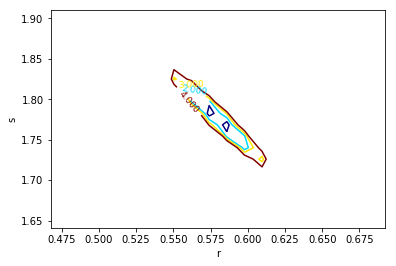

In [37]:
c=model_minimizer_minuit.minimizer.draw_contour('r','s')

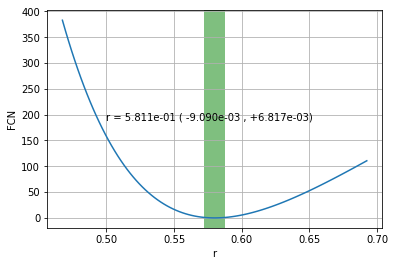

In [39]:
m=model_minimizer_minuit.minimizer.draw_profile('r')